# I ) 
# Linear Regression

### What is actually going on?

<IPython.core.display.Javascript object>


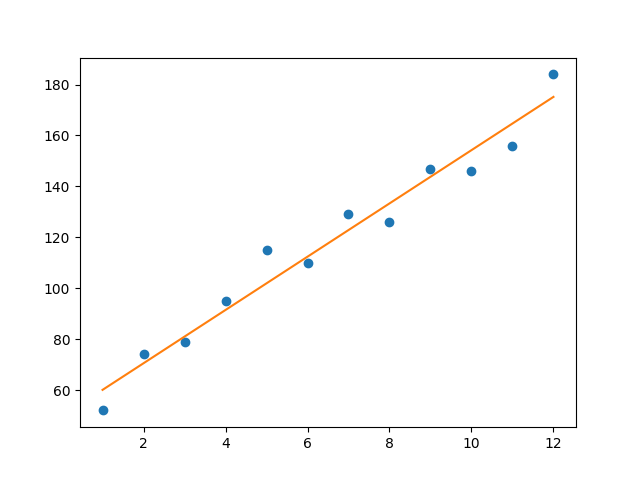

In [3]:
%matplotlib notebook

# this code finds the “best” b and m values using gradient descent and can be used for different types of data set.
import matplotlib.pyplot as plt

# Gradient Descent for Intercept
def get_gradient_at_b(x, y, b, m):
  N = len(x)  # number of points (x = y, is necessary)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  # average error value
  return b_gradient

# Gradient Descent for Slope
def get_gradient_at_m(x, y, b, m):
  N = len(x)  # number of points (x = y, is necessary)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff   # average error value
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return b, m

# you can change your data here
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
# take care about the learning rate that is taken for your set of data
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

### sklearn

<IPython.core.display.Javascript object>


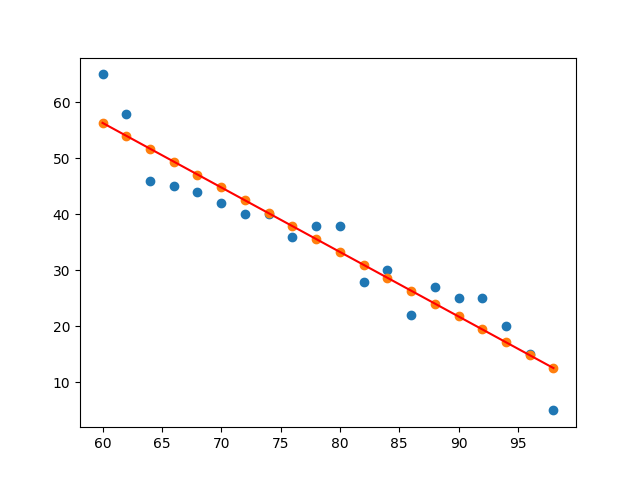

In [1]:
# use this code as an example for the ready-to-use scikit learn library
%matplotlib notebook
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
#y_predicted = line_fitter.predict(X)
sales_predict = line_fitter.predict(temperature)
plt.plot(temperature, sales, 'o')
plt.plot(temperature, sales_predict, 'o')
plt.plot(temperature, sales_predict, 'r')
plt.show()

# II )
# Multiple Linear Regression

## Scoring

R² is the percentage variation in y explained by all the x variables together
The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

R² score = 1 - u/v
with:
u =  residual sum of squares = ((y - y_predict) ** 2).sum()
v = total sum of squares (TSS) = ((y - y.mean()) ** 2).sum()

> ex: 
Say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).  
Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
df = pd.DataFrame(streeteasy)
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression() # mlt = multiple linear regression  
model=mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

# Input code here:
print("train score R2")
print(mlr.score(x_train, y_train))
print("\ntest score R2")
print(mlr.score(x_test, y_test))

train score R2
0.7725460559817883

test score R2
0.805037197535768


# III ) 
# A complete guided tutorial to guide us in the understanding of Linear regression (multivariate or univariate)

### Load the Data and Take a Peek

In [2]:
import pandas as pd

businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (max_columns) and the number of characters shown in a column (max_colwidth) with the below code:  
- pd.options.display.max_columns = number_of_columns_to_display  
- pd.options.display.max_colwidth = number_of_characters_to_display

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [4]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [5]:
# How many different businesses are in the dataset? What are the different features in the review DataFrame?
print(len(businesses))
print(reviews.columns)

188593
Index(['average_review_age', 'average_review_length',
       'average_review_sentiment', 'business_id', 'number_cool_votes',
       'number_funny_votes', 'number_useful_votes'],
      dtype='object')


In [6]:
# What is the range of values for the features in the user DataFrame?
users.describe()

,average_days_on_yelp,average_number_fans,average_number_friends,average_number_years_elite,average_review_count
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,2005.367009,11.590148,105.132000,0.923313,122.110660
std,554.174540,25.901801,162.653680,1.109289,208.814471
min,76.000000,0.000000,1.000000,0.000000,0.666667
25%,1647.000000,0.666667,26.666667,0.000000,21.000000
50%,1957.150000,3.583333,59.384615,0.583333,62.142857
75%,2312.238095,11.555556,117.666667,1.400000,143.454545
max,4860.000000,1174.666667,4219.000000,10.666667,6335.000000


In [7]:
# number of the row where business_id = 5EvUIR4IzCWUOm0PsUZXjA
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
30781,1194 Bloor Street W,0,{'RestaurantsPriceRange2': '1'},5EvUIR4IzCWUOm0PsUZXjA,"Restaurants, Burmese",Toronto,0,0,0,None,0,43.659419,-79.438004,Motherhome Myanmar Cuisine,Bloordale Village,M6H 1N2,1,4,3.0,ON,0,0


In [8]:
# Yelp rating, or stars, of the establishment with business_id = 5EvUIR4IzCWUOm0PsUZXjA
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

### Merge the data

```python
pd.merge(left, right, how='inner/outer/left/right', on='column(s)_to_merge_on')
```
* `left` is the DataFrame on the left side of our merge
* `right` is the DataFrame on the right side of our merge
* `how` describes the style of merge we want to complete (similar to inner/outer/left/right joins in SQL)
* `on` is the column or columns to perform the merge on (the column connecting the two tables)

In [9]:
print("businesses columns:")
print(businesses.columns, "\n length: ", len(businesses) )
print("")
print("reviews columns:")
print(reviews.columns, "\n length: ", len(reviews))

businesses columns:
Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards'],
      dtype='object') 
 length:  188593

reviews columns:
Index(['average_review_age', 'average_review_length',
       'average_review_sentiment', 'business_id', 'number_cool_votes',
       'number_funny_votes', 'number_useful_votes'],
      dtype='object') 
 length:  188593


In [10]:
print("df columns: ")
# here we start to merge together different dataframes
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(df.columns, "\n length: ", len(df))

df columns: 
Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_cool_votes', 'number_funny_votes', 'number_useful_votes'],
      dtype='object') 
 length:  188593


In [11]:
# and here we continue this
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')
print(df.columns, "\n length: ", len(df))

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_cool_votes', 'number_funny_votes', 'number_useful_votes',
       'average_days_on_yelp', 'average_number_fans', 'average_number_friends',
       'average_number_years_elite', 'average_review_count', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object') 
 length:  188593


### Clean the Data

```python
df.drop(list_of_features_to_remove, axis=1, inplace=True)
```

* `list_of_features_to_remove` is, you guessed it, the list of features we want to remove!
* `axis=1` lets Pandas know we want to drop columns, not rows, from our DataFrame (axis=0 is used for computations along rows!) 
* `inplace=True` lets us drop the columns right here in our DataFrame, instead of returning a new DataFrame that we could store in a new variable

For checking:  
statement `df.isna().any()` will check all of our columns and return `True` if there are any missing values or `NaN`s, or `False` if there are no missing values.

In [12]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']

df.drop(labels=features_to_remove, axis=1, inplace=True)

# Check if `df` is missing any values
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

As you can see, there are a few columns with missing values. Thus we can replace all of our `NaN`s with `0`s. To do this we can use the `.fillna()` method, which takes a dictionary as shown below:

```python
df.fillna({'column_1':val_to_replace_na,
           'column_2':val_to_replace_na,
           'column_3':val_to_replace_na},
          inplace=True)
```

* `column_1`, `column_2`, and `column_3` are the columns with missing values that we want to fill. We can include as many columns as we like in the dictionary that is passed to `.fill_na()`
* `val_to_replace_na` is the value that will replace the missing values, or `NaN`s
* `inplace=True` since we want to perform our changes in place and not return a new DataFrame

Fill the missing values in `df` with `0`. Afterwards, confirm the missing values have been filled with `df.isna().any()`.

In [13]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

# check
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

### Exploratory Analysis
*What kind of relationships do we see from the plots? What variables are good or bad features for our Yelp rating prediction model?*

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model.  
Pandas DataFrames have a really helpful method, `.corr()`, that allows us to see the correlation coefficients for each pair of our different features.  
- a correlation of `0` indicates that two features have no linear relationship  
- a correlation coefficient of `1` indicates two features have a perfect positive linear relationship  
- a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship.

In [14]:
# we call .corr() on df
df.corr()
# number_funny_votes has a correlation coefficient of 0.001320 with respect to stars, our Yelp rating
# This is a very weak correlation. What features best correlate, both positively and negatively, with Yelp rating?

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_cool_votes,number_funny_votes,number_useful_votes,average_days_on_yelp,average_number_fans,average_number_friends,average_number_years_elite,average_review_count,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.188598,0.117472,0.165775,0.129901,0.017794,0.015261,0.099141,0.026846,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.113262,0.060658,0.083832,0.045057,0.024901,0.016557,0.094233,0.040692,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.114094,0.060595,0.094000,-0.045849,0.018120,0.028307,0.083062,0.031203,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.147320,0.082213,0.120622,0.000448,0.023913,0.015937,0.082863,0.044006,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.119422,0.073215,0.098990,0.176133,0.104221,0.087231,0.210487,0.122982,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.860767,0.548164,0.746949,0.050451,0.000474,0.026206,0.014712,-0.002576,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.043375,0.001320,-0.000066,-0.038061,-0.031141,-0.007629,-0.064419,-0.066572,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.129165,0.071131,0.115583,0.048850,0.001131,-0.025522,0.063990,0.010618,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.079879,0.049945,0.077804,0.078443,-0.007124,0.027924,0.009551,-0.005260,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.031577,0.032199,0.028122,0.820888,0.243377,0.218990,0.377335,0.261623,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating.  
We can use Matplotlib's `.scatter()` method with the below syntax to plot what these correlations look like:


```python
plt.scatter(x_values_to_plot, y_values_to_plot, alpha=blending_val)
```

* `x_values_to_plot` are the values to be plotted along the x-axis
* `y_values_to_plot` are the values to be plotted along the y-axis
* `alpha=blending_val` is the blending value, or how transparent (0) or opaque (1) a plotted point is. This will help us distinguish areas of the plot with high point densities and low point densities  

WHAT WE WILL DO :  
Plot the three features that correlate most with Yelp rating (`average_review_sentiment`, `average_review_length`, `average_review_age`) against `stars`, our Yelp rating.

>Note: What is `average_review_sentiment`?  
`average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page.  
The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

In [15]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

<Figure size 640x480 with 1 Axes>

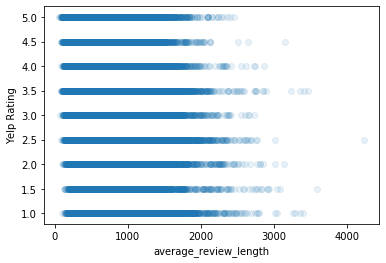

In [16]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'],df['stars'],alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()

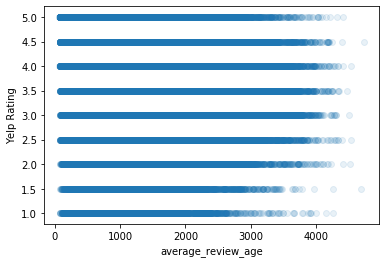

In [17]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

Here below, we plot a lowly correlating feature, such as `number_funny_votes`, against `stars` (just to illustrate)

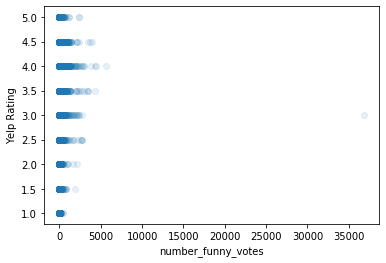

In [18]:
# plot number_funny_votes against stars here
plt.scatter(df['number_funny_votes'],df['stars'],alpha=0.1)
plt.xlabel('number_funny_votes')
plt.ylabel('Yelp Rating')
plt.show()

### Data Selection
*- Create a new DataFrame `features` that contains the columns we want to model on: `average_review_length` and `average_review_age`.*  
*- Create another DataFrame `ratings` that stores the value we want to predict, Yelp rating, or `stars` in `df`.*

From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. 

We want to dig a little deeper than `average_review_sentiment`, let's choose to create our first model with `average_review_length` and `average_review_age` as features.


>Pandas lets us select one column of a DataFrame with the following syntax:
```python
subset_of_data = df['feature_to_select']
```

>Pandas also lets us select multiple columns from a DataFrame with this syntax:
```python
subset_of_data = df[list_of_features_to_select]
```

In [19]:
features = df[['average_review_length','average_review_age']]
ratings = df['stars']
features.head()

,average_review_length,average_review_age
0,532.916667,618.250000
1,481.333333,371.666667
2,252.000000,1106.200000
3,672.625000,398.500000
4,1015.500000,1412.750000


In [20]:
ratings.head(18)

0     4.0
1     4.5
2     4.0
3     1.5
4     2.0
5     4.0
6     4.0
7     2.0
8     2.5
9     3.5
10    1.5
11    4.0
12    4.0
13    3.5
14    4.5
15    2.5
16    3.5
17    4.0
Name: stars, dtype: float64

### Split the Data into Training and Testing Sets  
import `LinearRegression` from scikit-learn's `linear_model` module.  


Remember, this function returns 4 items in this order:
1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

### Create and Train the Model


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways.  
The first way will be by using the `.score()` method, which provides the R² value for our model.   
Remember, R² is the coefficient of determination = a measure of how much of the variance in our dependent variable (predicted Yelp rating) is explained by our independent variables (feature data).   
R² values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data

In [24]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.08250309566544889
0.08083081210060561


After all that hard work, we can finally take a look at the coefficients on our different features!  
The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [26]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074552),
 ('average_review_age', -0.00011621626836366473)]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings!  
Our model has a .predict() method which uses the model's coefficients to calculate the predicted Yelp rating.  
*Call .predict() on X_test and assign the values to y_predicted. Use Matplotlib to plot y_test vs y_predicted.*  
For a perfect linear regression model we would expect to see the data plotted along the line y = x, indicating homoscedasticity. Is this the case? If not, why not? Would you call this model heteroscedastic or homoscedastic?

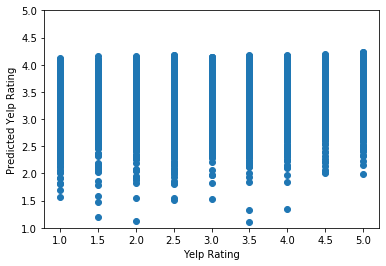

In [29]:
y_predicted = model.predict(X_test)

plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()